Macierz TF-IDF:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.35469396 0.         0.         0.43254606
  0.         0.         0.         0.43254606 0.35469396 0.
  0.43254606 0.         0.         0.         0.         0.
  0.43254606 0.         0.         0.        ]
 [0.4198708  0.         0.         0.4198708  0.         0.
  0.         0.         0.         0.4198708  0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.4198708  0.         0.34430007 0.4198708  0.
  0.         0.         0.         0.        ]
 [0.         0.         0.49892408 0.         0.         0.
  0.         0.         0.40912489 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.40912489 0.         0.
  0.         0.         0.40912489 0.49892408]
 [0.         0.         0.         0.         0.         0.
  0.46262479 0.         0.         0.         0.4626247

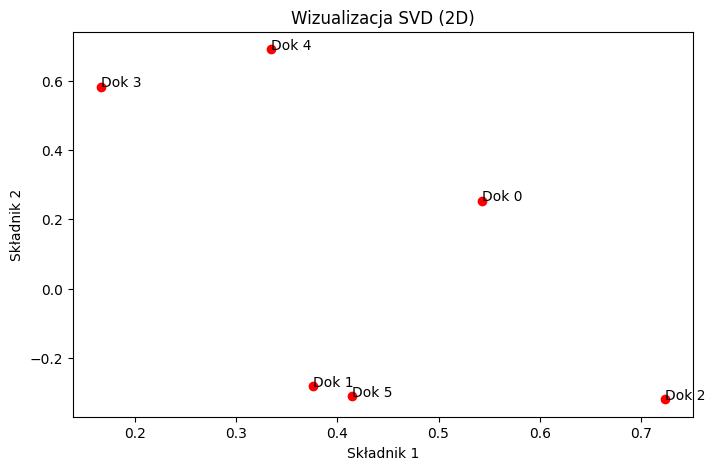

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from gensim.models import Word2Vec
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

texts = [
    "Kot siedzi na macie i obserwuje mysz",
    "Pies biega po ogrodzie i goni kota",
    "Kot i pies to domowe zwierzęta",
    "Matka gotuje pyszny obiad w kuchni",
    "Obiad jest gotowy i czeka na stole",
    "Gotowanie to pasja mojej matki"
]

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(texts)
feature_names = vectorizer.get_feature_names_out()

print("Macierz TF-IDF:")
print(tfidf_matrix.toarray())

sentences = [text.lower().split() for text in texts]
model_w2v = Word2Vec(sentences, vector_size=50, window=5, min_count=1)

print("\nWektor dla słowa 'kot':")
print(model_w2v.wv['kot'])

dictionary = Dictionary(sentences)
corpus = [dictionary.doc2bow(text) for text in sentences]
lda = LdaModel(corpus, num_topics=2, id2word=dictionary, passes=10)

print("\nTematy zidentyfikowane przez LDA:")
for idx, topic in lda.print_topics():
    print(f"Temat {idx}: {topic}")


svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(tfidf_matrix)

plt.figure(figsize=(8, 5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], color='red')
for i, txt in enumerate(texts):
    plt.annotate(f"Dok {i}", (X_reduced[i, 0], X_reduced[i, 1]))

plt.title("Wizualizacja SVD (2D)")
plt.xlabel("Składnik 1")
plt.ylabel("Składnik 2")
plt.show()